# Table of Content
- Imports
- Load Data
- Kagggle Fake News DataSet.csv
    - All Actions to be Taken
- Kaggle News Category Dataset_v2.json
    - EDA 
- BuzzFeed 'buzzfeed_2018_fake_news.csv'

# Imports

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from IPython.display import display, Markdown, Latex

# Load Data

In [6]:
_  = os.path.join('data', 'kaggle_fake_news_train.csv')
kaggle_fakenews_df = pd.read_csv(_)

In [7]:
# OS safe file path
_  = os.path.join('data', 'kaggle_news_category_dataset_v2.json')

# Get json data as dictionary
_ = [json.loads(line) for line in open(_, 'r')]

#create dataframe with list of dictionaries
news_catagory_df = pd.DataFrame(_)

In [8]:
_  = os.path.join('data', 'buzzfeed_2018_fake_news.csv')
buzz_feed_fakenews_df = pd.read_csv(_)

# Kagggle Fake News DataSet csv

In [12]:
display(fake_news_df.head())
print('Unique ids and shape', (fake_news_df.id.nunique(), fake_news_df.shape[0]))

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Unique ids and shape (20800, 20800)


The id columns seems to be the same as the index.
    
**Actions to be taken**
- Removing the id columns entirely

In [76]:
display(Markdown(
"""
The text is the most defining feature, Any observation without it is not technically an article. Even without an author or title the text is still very important and will be preserved.

**Actions to be taken**
- All rows with nan text will be classified as fake
- All text and title with nan will be filled with empty strings
"""))
fake_news_df.info()


The text is the most defining feature, Any observation without it is not technically an article. Even without an author or title the text is still very important and will be preserved.

**Actions to be taken**
- All rows with nan text will be classified as fake
- All text and title with nan will be filled with empty strings


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
id        20800 non-null int64
title     20242 non-null object
author    18843 non-null object
text      20761 non-null object
label     20800 non-null int64
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


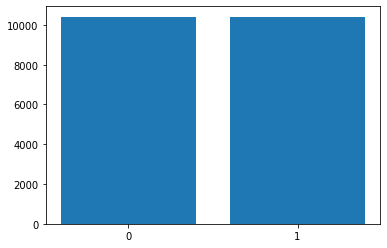

In [11]:
x = fake_news_df.label.value_counts().index
y = fake_news_df.label.value_counts()
plt.bar(x=x, tick_label=x, height=y);

The target's distubtion of data is uniform. No actions required



the average number of articles written by an author is ~ 4.5. I do not believe the majority of authors will effect the model only a small number of outlier will should be consider and by human natrue some authors will share the same name for different publications 


Max number of articles written: 243
Min number of articles written: 1
Average number of articles written: 4.485360628421804
Median number of articles written: 1.0


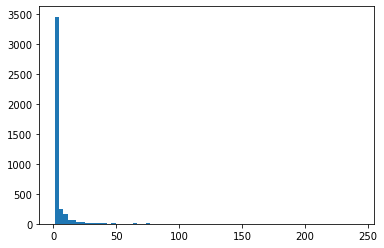

In [79]:
print('Max number of articles written:', fake_news_df.author.value_counts().max())
print('Min number of articles written:', fake_news_df.author.value_counts().min())
print('Average number of articles written:', fake_news_df.author.value_counts().mean())
print('Median number of articles written:', fake_news_df.author.value_counts().median())
plt.hist(fake_news_df.author.value_counts(), bins=70);

the average number of articles written by an author is ~ 4.5. I do not believe the majority of authors will effect the model only a small number of outlier will should be consider and by human natrue some authors will share the same name for different publications 


Average number of words in factual articles: 878.9965341292
Median number of words in factual articles: 773.0

Average number of words in factual articles: 639.06847210218
Median number of words in factual articles: 382.0


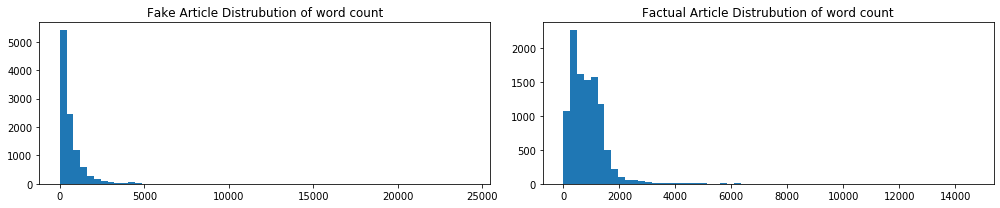

In [40]:
factual = fake_news_df[fake_news_df['label'] == 0]['text'].map(lambda word: len(word.split()))
fake = fake_news_df[fake_news_df['label'] == 1]['text'].map(lambda word: len(word.split()) 
                                                            if isinstance(word, str) == True
                                                            else 0
                                                           )

print('Average number of words in factual articles:', factual.mean())
print('Median number of words in factual articles:', factual.median())
print()
print('Average number of words in factual articles:', fake.mean())
print('Median number of words in factual articles:', fake.median())

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 3))

ax[0].hist(fake, bins=60)
ax[0].set_title('Fake Article Distrubution of word count')
ax[1].hist(factual, bins=60)
ax[1].set_title('Factual Article Distrubution of word count')

plt.tight_layout();

- The number of words in a fake article aren't normally distrubted and are on average 200 words less except for outliers.
- Factual articles distubtion is skewed to the left. I assume this is due to wanting to be a shorter read for users.

### <span style ="color:blue"> All Actions to be Taken </span>

- All rows with nan text will be classified as fake
- All text and title with nan will be filled with empty strings to keep the text
- Remove the entire id columns

# Kaggle News Category Dataset_v2.json

In [10]:
news_catagory_df.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


- A link to each article is provided. Tne data is clean with no nan values but no classification for fake or realible. The publication can be picked from the link. I'll need to do some research to compose a list of publication that are satire and reliable
- short description will be concatanated to all other text columns to be preped for combination with with the Kagggle Fake News DataSet csv dataset

# BuzzFeed fake_news Data Set

In [9]:
buzz_feed_fakenews_df.head()

,title,url,fb_engagement,published_date,category,source
0,"Lottery winner arrested for dumping $200,000 o...",https://worldnewsdailyreport.com/lottery-winne...,"2,383,021.00",2018-05-13,Crime,NaN
1,Former first lady Barbara Bush dies at 92 - CNN,http://breaking-cnn.com/former-first-lady-barb...,"2,290,000.00",2018-04-16,Politics,Trendolizer
2,Woman sues Samsung for $1.8M after cell phone ...,https://worldnewsdailyreport.com/woman-sues-sa...,"1,304,430.00",2018-09-19,Medical,NaN
3,BREAKING: Michael Jordan Resigns From The Boar...,https://trumpbetrayed.us/all/breaking-michael-...,"911,336.00",2018-09-05,Business,NaN
4,Donald Trump Ends School Shootings By Banning ...,https://www.8shit.net/donald-trump-ends-school...,"830,116.00",2018-02-23,Politics,NaN


In [13]:
buzz_feed_fakenews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13961 entries, 0 to 13960
Data columns (total 6 columns):
title             13960 non-null object
url               13961 non-null object
fb_engagement     13961 non-null object
published_date    13961 non-null object
category          11854 non-null object
source            9 non-null object
dtypes: object(6)
memory usage: 654.5+ KB


- The Sources columns seem to be mostly null. Being provided a source and url mean I really don't need the sources column.
- This dataset doesn't provide an article in text format. 

**Actions to be taken**
- Remove the source column
- I'll be scraping them and adding it as a new column to be merge with the kaggle dataset
- Nan sources will be replaced with unkowns t perserve urls

### <span style ="color:blue"> All Actions to be Taken </span>